In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
colors = ['#522258','#8C3061','#EB3678','#C63C51','#D95F59']

In [3]:
url = "District_Tax _Data_2020_To_2024.csv"
data = pd.read_csv(
    url,
    sep='\t',  # Replace with the correct delimiter
    encoding='Windows-1252',  # Adjust encoding as necessary
    on_bad_lines='skip',
    quoting=3  # Ignore quoting issues
)
print(data)

      Districts           States Regions         2020         2021  \
0    Ahmednagar      Maharashtra    West  174587237.0  263469344.0   
1         Akola      Maharashtra    West  181228065.0  155494857.0   
2      Amravati      Maharashtra    West  431638539.0  310931730.0   
3          Beed      Maharashtra    West  338593707.0  332477798.0   
4      Bhandara      Maharashtra    West  209012116.0  336738182.0   
..          ...              ...     ...          ...          ...   
758       Mandi  HimachalPradesh   North  374971771.0  484948272.0   
759      Shimla  HimachalPradesh   North  351460311.0  387691885.0   
760     Sirmaur  HimachalPradesh   North  480504777.0  423508408.0   
761       Solan  HimachalPradesh   North  436997589.0  340998566.0   
762         Una  HimachalPradesh   North  394686728.0  342023988.0   

            2022         2023         2024  
0    219510483.0  116699728.0  428989532.0  
1    444944609.0  224088259.0  491637929.0  
2    393612476.0  328168

In [4]:
data.sort_values(by='Districts' , inplace = True)
data.reset_index(drop=True , inplace = True)
print(data)

       Districts         States  Regions         2020         2021  \
0       Adilabad      Telangana    South  318329417.0  281463057.0   
1      AgarMalwa  MadhyaPradesh  Central  387325663.0  394051943.0   
2           Agra   UttarPradesh    North  417404706.0  309259316.0   
3      Ahmedabad        Gujarat     West  338276315.0  399716178.0   
4     Ahmednagar    Maharashtra     West  174587237.0  263469344.0   
..           ...            ...      ...          ...          ...   
758  Yamunanagar        Haryana    North  185305337.0  172731711.0   
759        Yanam     Puducherry    South  238236640.0  177919858.0   
760     Yavatmal    Maharashtra     West  129663991.0  143202002.0   
761      Zanskar         Ladakh    North  381087680.0  321893979.0   
762    Zunheboto       Nagaland     East  264738914.0  261577196.0   

            2022         2023         2024  
0    156410413.0  117981505.0  235489975.0  
1    109729300.0  235343486.0  399716178.0  
2    102124088.0  181228

In [5]:
data.isnull().sum()

Districts    0
States       0
Regions      0
2020         4
2021         8
2022         4
2023         4
2024         2
dtype: int64

In [6]:
'''As we seen  above we have some missing values in columns 2020,2021,2022,2023,2024 as all the values
are integer now we will fill all this values minimum values in the dataframe only numerical value'''
numeric_columns = ['2020', '2021', '2022', '2023', '2024']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
min_val = data[numeric_columns].min().min()
data.loc[:, numeric_columns] = data.loc[:, numeric_columns].fillna(min_val)
data.isnull().sum()

Districts    0
States       0
Regions      0
2020         0
2021         0
2022         0
2023         0
2024         0
dtype: int64

In [7]:
'''as of now our data is cleaned now we start further analysis'''
# now we will find the district with highest tax paid in last five years 
# for that we need to create a column with total tax paid in last five years

data['Total'] = data[numeric_columns].sum(axis=1)
print(data)

       Districts         States  Regions         2020         2021  \
0       Adilabad      Telangana    South  318329417.0  281463057.0   
1      AgarMalwa  MadhyaPradesh  Central  387325663.0  394051943.0   
2           Agra   UttarPradesh    North  417404706.0  309259316.0   
3      Ahmedabad        Gujarat     West  338276315.0  399716178.0   
4     Ahmednagar    Maharashtra     West  174587237.0  263469344.0   
..           ...            ...      ...          ...          ...   
758  Yamunanagar        Haryana    North  185305337.0  172731711.0   
759        Yanam     Puducherry    South  238236640.0  177919858.0   
760     Yavatmal    Maharashtra     West  129663991.0  143202002.0   
761      Zanskar         Ladakh    North  381087680.0  321893979.0   
762    Zunheboto       Nagaland     East  264738914.0  261577196.0   

            2022         2023         2024         Total  
0    156410413.0  117981505.0  235489975.0  1.109674e+09  
1    109729300.0  235343486.0  399716178.

In [8]:
data.to_csv("Sorted_Data.csv",header=True,index=False)

In [9]:
max_row = data[data['Total'] == data['Total'].max()]
print(max_row)
print("------------------------------------------------------------------------------------------")
min_row = data[data['Total'] == data['Total'].min()]
print(min_row)

     Districts        States Regions         2020         2021         2022  \
225  Ghaziabad  UttarPradesh   North  455894650.0  473656423.0  373067416.0   

            2023         2024         Total  
225  464964752.0  474120304.0  2.241704e+09  
------------------------------------------------------------------------------------------
    Districts  States Regions         2020         2021         2022  \
351   Khordha  Odisha    East  136805322.0  129175695.0  247660756.0   

            2023         2024        Total  
351  109155552.0  162709433.0  785506758.0  


In [18]:
# top five district pays most tax in last five years here we use nlargest() function for that
print("-------------------------Top Five Districts------------------------------")
top_five_districts = data.nlargest(5, 'Total')
print(top_five_districts)
print("----------------------Bottom Five Districts------------------------------")
bottom_five_districts = data.nsmallest(5,'Total')
print(bottom_five_districts)

-------------------------Top Five Districts------------------------------
          Districts           States Regions         2020         2021  \
225       Ghaziabad     UttarPradesh   North  455894650.0  473656423.0   
91          Bhojpur            Bihar    East  485741753.0  486913664.0   
551            Puri           Odisha    East  424179815.0  482580035.0   
77   BengaluruRural        Karnataka    East  482873013.0  381246376.0   
712        Udhampur  JammuandKashmir   North  307599109.0  379415266.0   

            2022         2023         2024         Total  
225  373067416.0  464964752.0  474120304.0  2.241704e+09  
91   458726768.0  330341502.0  414987640.0  2.176711e+09  
551  492846462.0  402279733.0  363264870.0  2.165151e+09  
77   412253182.0  478893399.0  385702079.0  2.140968e+09  
712  476244393.0  484716331.0  455174414.0  2.103150e+09  
----------------------Bottom Five Districts------------------------------
        Districts             States  Regions        

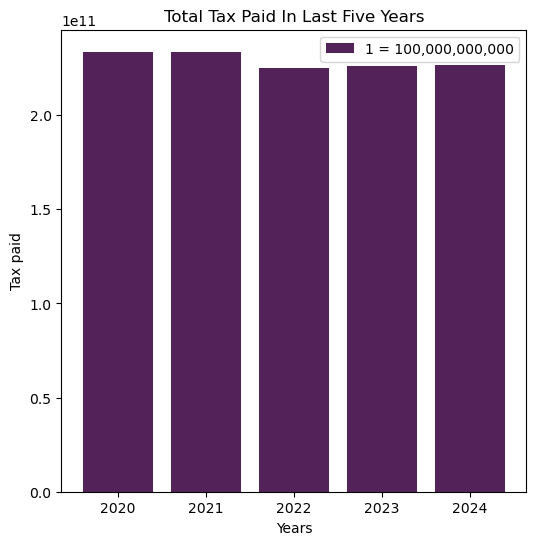

In [11]:
T2020 = data['2020'].sum()
T2021 = data['2021'].sum()
T2022 = data['2022'].sum()
T2023 = data['2023'].sum()
T2024 = data['2024'].sum()
x_axis = [2020,2021,2022,2023,2024]
y_axis = [T2020,T2021,T2022,T2023,T2024]
plt.figure(figsize=(6, 6))
plt.bar(x_axis,y_axis,color='#522258')
plt.title('Total Tax Paid In Last Five Years')
plt.xlabel('Years')
plt.ylabel('Tax paid')
plt.legend(["1 = 100,000,000,000"], loc="upper right")
plt.show()

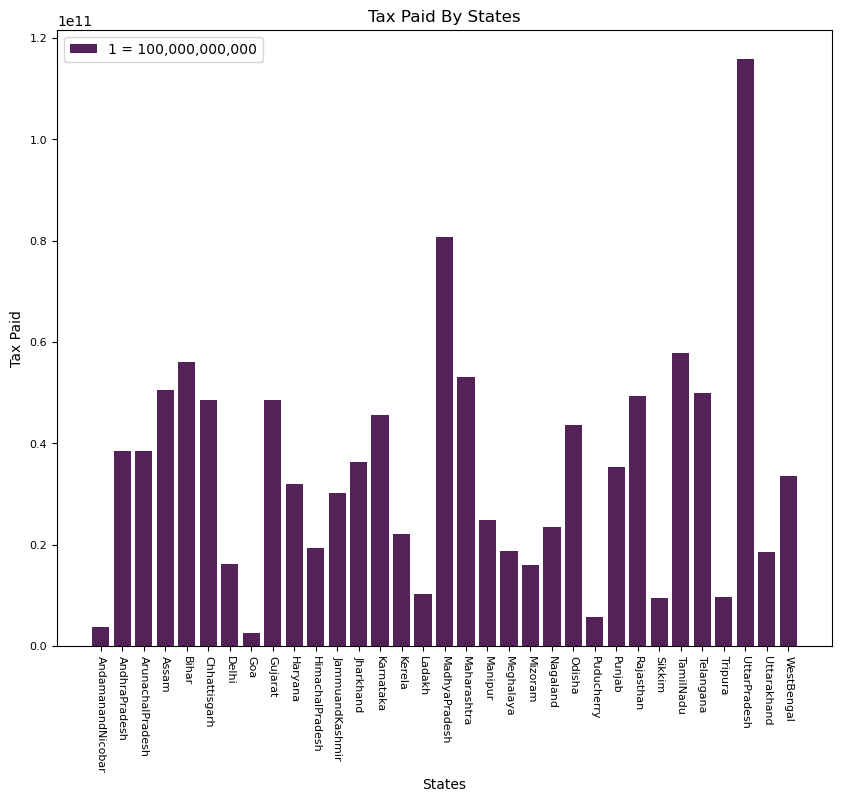

In [12]:
# Now we find the total tax paid by an state and find state that pay more tax in last 5 years
state_total_tax = data.groupby('States')[['2020', '2021', '2022', '2023', '2024']].sum()
state_total_tax['Total_Tax'] = state_total_tax.sum(axis=1)
#now we will create a bar graph to check the state that pays more tax in last five years
x = state_total_tax.index.tolist()
y = state_total_tax['Total_Tax'].tolist()
plt.figure(figsize=(10,8))
plt.bar(x,y,color='#522258')
plt.title('Tax Paid By States')
plt.xlabel('States')
plt.ylabel('Tax Paid')
plt.legend(["1 = 100,000,000,000"], loc="upper left")
plt.xticks(fontsize=8,rotation=270)
plt.yticks(fontsize=8)
plt.show()

In [13]:
# As we seen in above graph Tripura is the state that pays more tax in last five years
# let see top five state who pays more tax
top_five_states = state_total_tax['Total_Tax'].nlargest(5)
print("**** top five states pays more tax in last five years *****")
print(top_five_states)

**** top five states pays more tax in last five years *****
States
UttarPradesh     1.158124e+11
MadhyaPradesh    8.071141e+10
TamilNadu        5.789634e+10
Bihar            5.614103e+10
Maharashtra      5.307299e+10
Name: Total_Tax, dtype: float64


In [14]:
# now we find the region that pays more tax in last five years we have 5 regions (north,east,west,south,central)
region = data.groupby('Regions')[['2020', '2021', '2022', '2023', '2024']].sum()
region['Total_Tax'] = region.sum(axis=1)
region

,2020,2021,2022,2023,2024,Total_Tax
Regions,,,,,,
Central,2.583124e+10,2.624601e+10,2.455176e+10,2.543139e+10,2.719686e+10,1.292573e+11
East,7.933673e+10,8.480006e+10,7.672084e+10,7.992700e+10,7.610896e+10,3.968936e+11
North,6.671128e+10,6.688112e+10,6.447965e+10,6.448931e+10,6.430323e+10,3.268646e+11
South,4.054827e+10,3.485070e+10,3.738177e+10,3.620479e+10,3.853351e+10,1.875190e+11
West,2.124405e+10,2.073563e+10,2.192548e+10,2.005633e+10,2.040282e+10,1.043643e+11


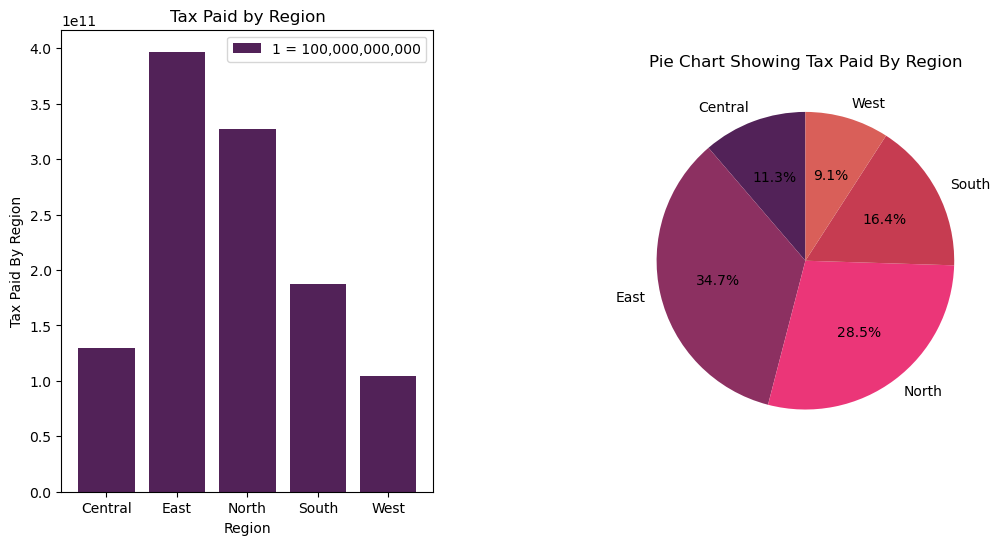

In [15]:
Region_x = region.index.tolist()
Region_y = region['Total_Tax'].tolist()
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1) #1.row 2.columns 1st subplot
plt.bar(Region_x,Region_y,color='#522258')
plt.title("Tax Paid by Region")
plt.legend(["1 = 100,000,000,000"], loc="upper right")
plt.xlabel("Region")
plt.ylabel("Tax Paid By Region")
plt.subplot(1,2,2) #1row 2columns 2nd sub plot
plt.pie(Region_y , labels = Region_x , colors = colors , autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart Showing Tax Paid By Region")
plt.subplots_adjust(wspace=0.5) 

In [16]:
#as of above graph east and north region pays more than 50% of total tax  

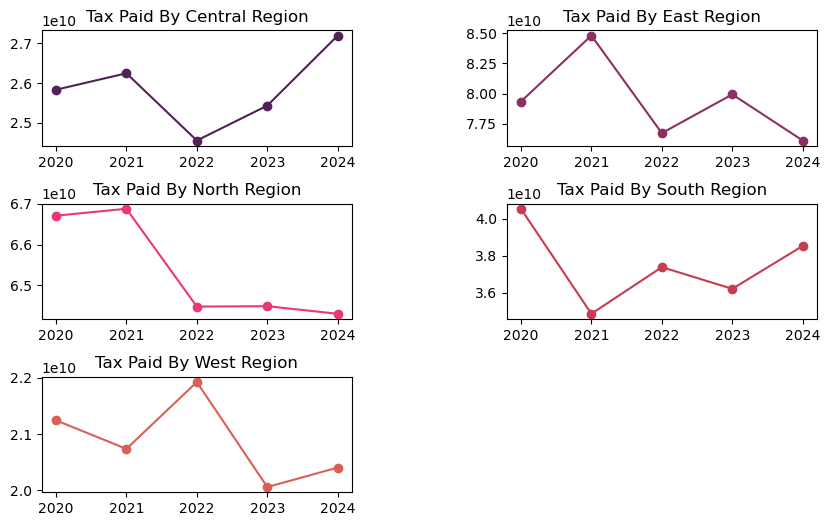

In [17]:
# let see the tax growth of each region over past time
central_R = [2.583124e+10,2.624601e+10,2.455176e+10,2.543139e+10,2.719686e+10]
east_R=[7.933673e+10,8.480006e+10,7.672084e+10,7.992700e+10,7.610896e+10]
north_R=[6.671128e+10,6.688112e+10,6.447965e+10,6.448931e+10,6.430323e+10]
south_R=[4.054827e+10,3.485070e+10,3.738177e+10,3.620479e+10,3.853351e+10]
west_R=[2.124405e+10,2.073563e+10,2.192548e+10,2.005633e+10,2.040282e+10]
censw_r = [2020,2021,2022,2023,2024]
plt.figure(figsize=(10,6))
plt.subplot(3,2,1)
plt.plot(censw_r ,central_R, marker='o', linestyle='-', color='#522258', label='Line 1')
plt.title('Tax Paid By Central Region')
plt.subplot(3,2,2)
plt.plot(censw_r ,east_R, marker='o', linestyle='-', color='#8C3061', label='Line 1')
plt.title('Tax Paid By East Region')
plt.subplot(3,2,3)
plt.plot(censw_r ,north_R, marker='o', linestyle='-', color='#EB3678', label='Line 1')
plt.title('Tax Paid By North Region')
plt.subplot(3,2,4)
plt.plot(censw_r ,south_R, marker='o', linestyle='-', color='#C63C51', label='Line 1')
plt.title('Tax Paid By South Region')
plt.subplot(3,2,5)
plt.plot(censw_r ,west_R, marker='o', linestyle='-', color='#D95F59', label='Line 1')
plt.title('Tax Paid By West Region')
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.5)